In [1]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import random
from scipy import stats

random.seed(42)

a = 4.5
b = 1.5
sample_size = 10000

number = stats.beta.rvs(a, b, size=sample_size, random_state=42)

p = sorted([x for x in number])
y = [1 if random.random() < x else 0 for x in p]


def evaluate(p, y):
    y, p = zip(*sorted(zip(y, p), key=lambda x: x[1]))
    observation = lowess(y, p, frac=1/3, it=0,
                         is_sorted=True, return_sorted=False)
    if all([x == 0 for x in observation]):
        # window smooth
        window_size = int(len(y)/3)
        observation = np.convolve(y, np.ones(
            window_size), 'same') / window_size
    # Calculating ICI and other statistics
    ICI = np.mean(np.abs(observation - p))
    E50 = np.median(np.abs(observation - p))
    E90 = np.quantile(np.abs(observation - p), 0.9)
    Emax = np.max(np.abs(observation - p))

    # Display the results
    print(f"ICI: {ICI:.4f}, E50: {E50:.4f}, E90: {E90:.4f}, Emax: {Emax:.4f}")


evaluate(p, y)
evaluate(list(map(lambda x: x - 0.05, p)), y)
evaluate(list(map(lambda x: x + 0.05, p)), y)
evaluate([random.random() for _ in range(len(y))], y)
evaluate([sum(y)/len(y)] * len(y), y)

ICI: 0.0051, E50: 0.0027, E90: 0.0129, Emax: 0.0441
ICI: 0.0502, E50: 0.0485, E90: 0.0629, Emax: 0.0941
ICI: 0.0498, E50: 0.0515, E90: 0.0582, Emax: 0.0629
ICI: 0.3133, E50: 0.2503, E90: 0.6547, Emax: 0.7638
ICI: 0.1337, E50: 0.0989, E90: 0.3263, Emax: 0.5159


/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/opt/homebrew/Caskroom/miniforge/base/envs/fsrs4anki/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


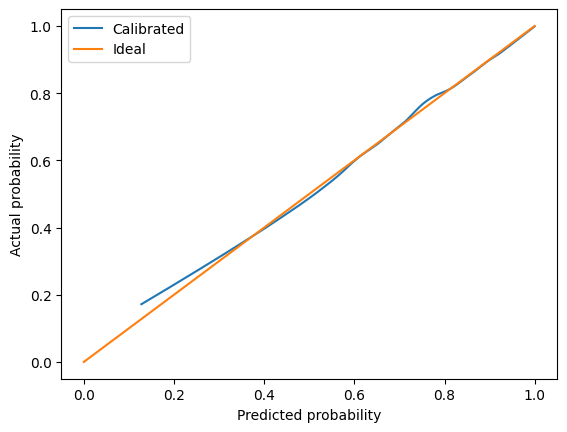

In [2]:
import matplotlib.pyplot as plt


def calibrate(p, y):
    y, p = zip(*sorted(zip(y, p), key=lambda x: x[1]))
    observation = lowess(y, p, frac=1/3, it=0,
                         is_sorted=True, return_sorted=False)
    if all([x == 0 for x in observation]):
        # window smooth
        window_size = int(len(y)/3)
        observation = np.convolve(y, np.ones(
            window_size), 'same') / window_size
    plt.plot(p, observation)
    plt.plot([0, 1], [0, 1])
    plt.xlabel("Predicted probability")
    plt.ylabel("Actual probability")
    plt.legend(["Calibrated", "Ideal"])
    plt.show()


calibrate(p, y)